**Problem Statement**

 

 

**Cardiovascular diseases are the leading cause of death globally. To identify the causes and to develop a system to predict heart attack in an effective manner is necessary. The presented data has all information about all the relevant factors that might have an impact on heart health. The data needs to be explained in detail for any further analysis.**

**Preliminary analysis**

In [12]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [14]:
health_care_df = pd.read_excel('data.xlsx')

In [15]:
health_care_df.shape

(301, 14)

In [16]:
health_care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    int64  
 13  target    301 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.1 KB


In [18]:
health_care_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [7]:
health_care_df.dropna(inplace=True)
health_care_df.drop_duplicates(inplace=True)

In [8]:
health_care_df.shape

(300, 14)

**Preliminary Statistical Summary**

In [9]:
health_care_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,54.433333,0.683333,0.963333,131.626667,246.743333,0.146667,0.526667,149.663333,0.326667,1.046667,1.396667,0.723333,2.330000,0.543333
std,9.076720,0.465953,1.032250,17.619557,51.837514,0.354364,0.526192,22.889658,0.469778,1.163760,0.616920,1.008387,0.585014,0.498951
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
non_categorical_fields = ['age','trestbps','chol','oldpeak','thalach']

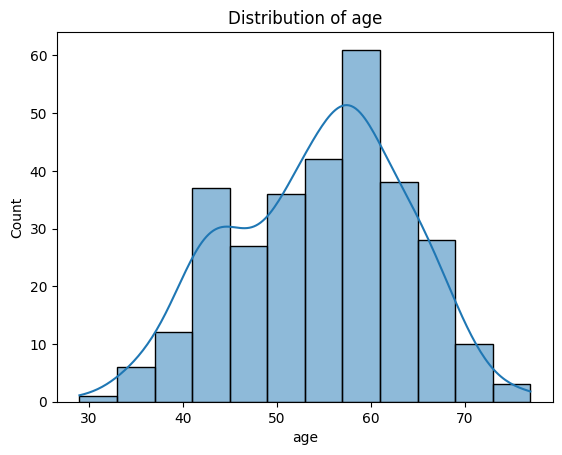

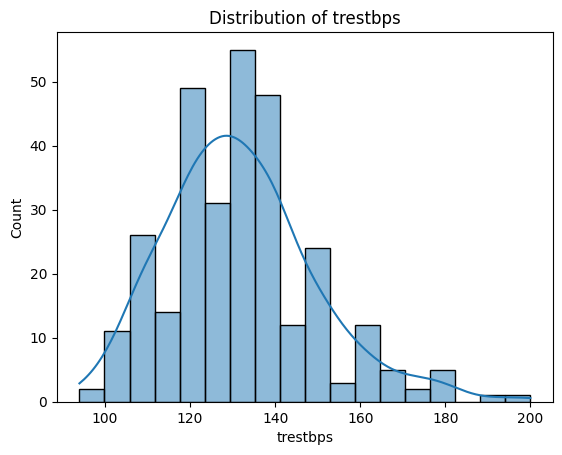

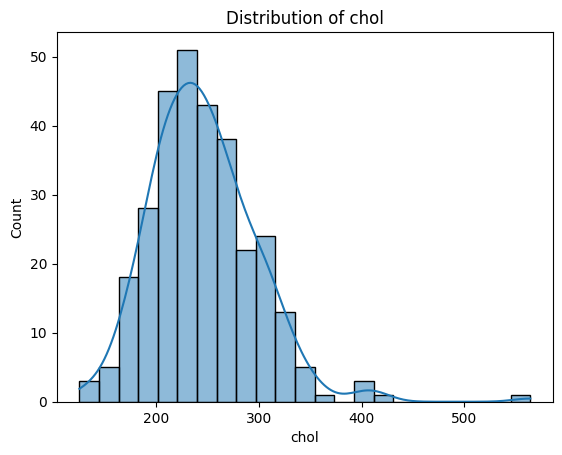

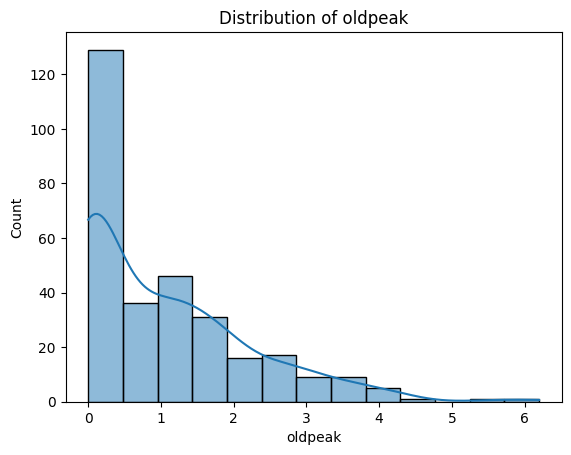

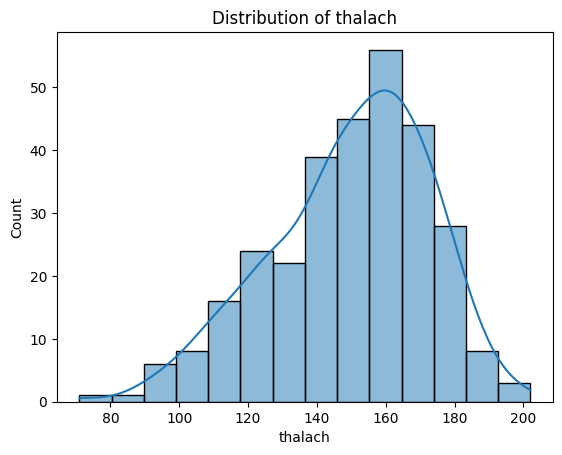

In [17]:
for i in non_categorical_fields:
    sns.histplot(health_care_df[i],kde=True)
    plt.title(f'Distribution of {i}')
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    plt.show()

**Categorical Data Variables**

In [ ]:
health_care_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
categorical_fields = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']

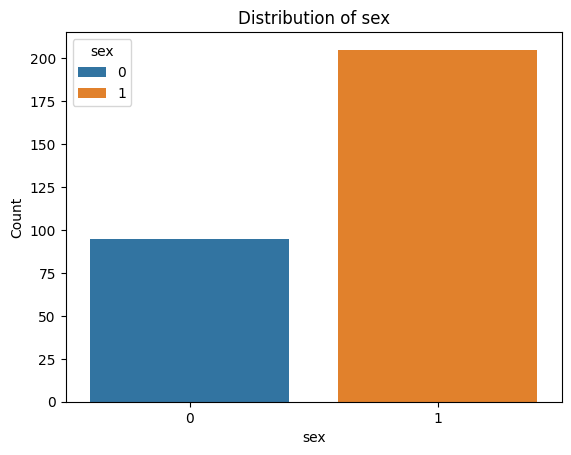

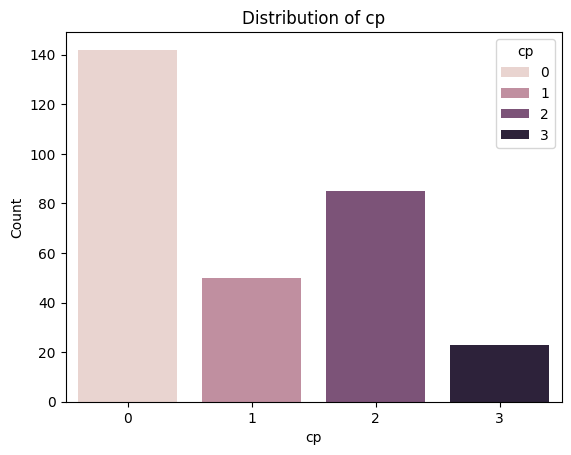

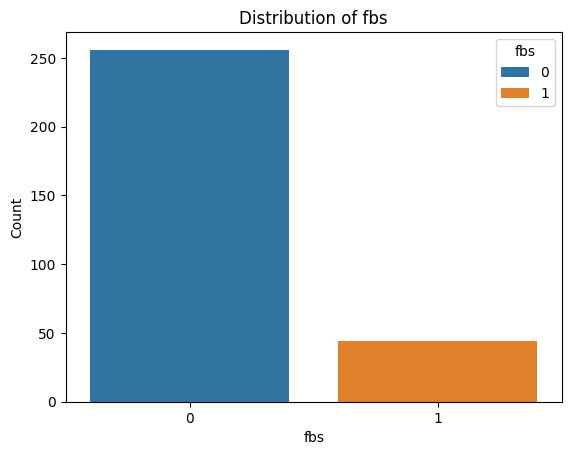

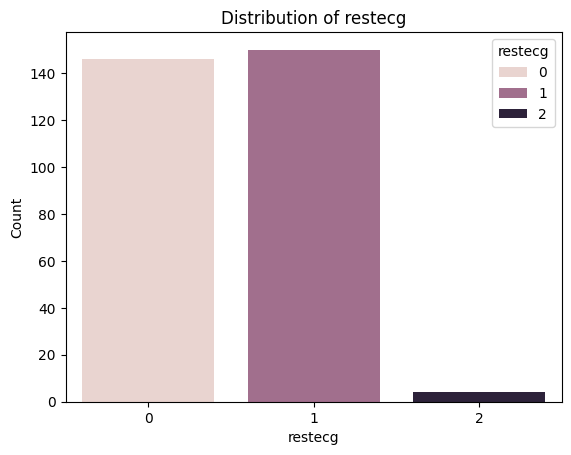

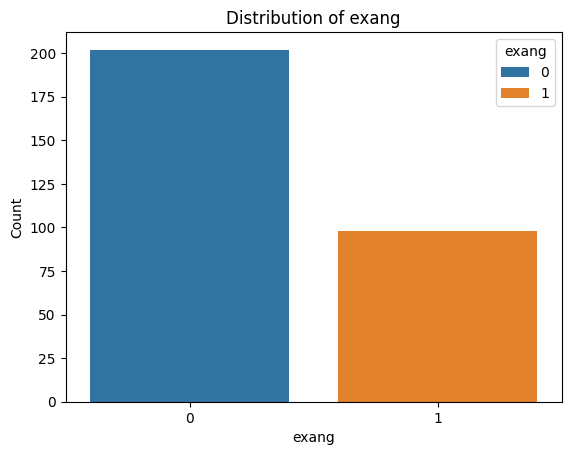

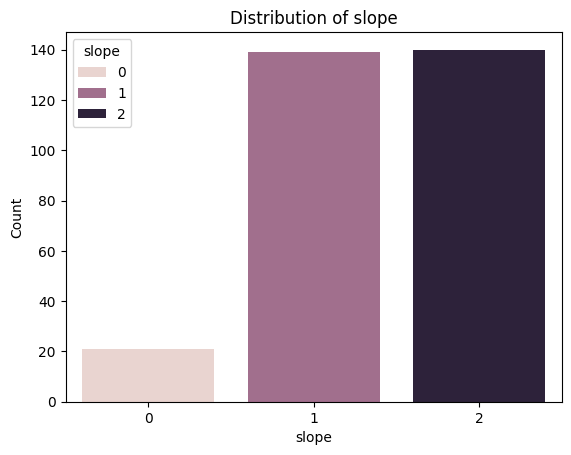

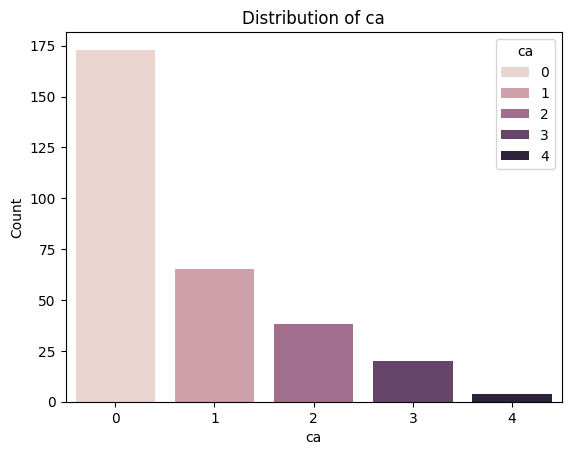

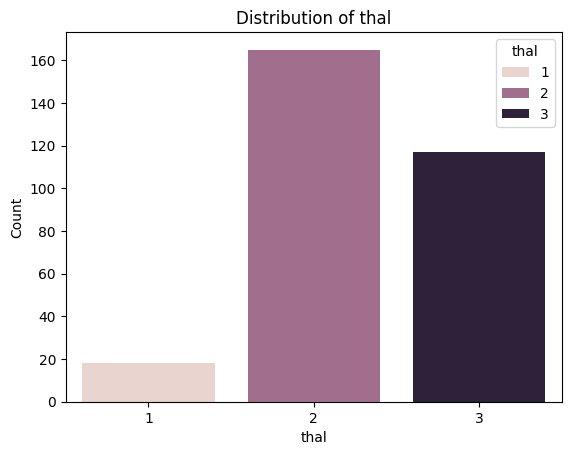

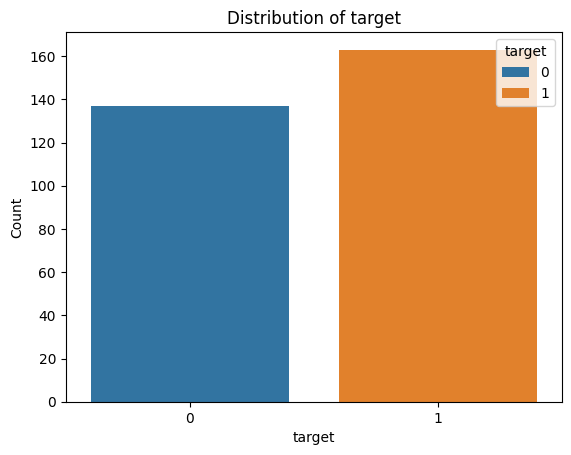

In [ ]:
for i in categorical_fields:
    sns.countplot(data=health_care_df,x= i,hue=i)
    plt.title(f'Distribution of {i}') 
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    plt.show()

In [ ]:
for i in categorical_fields:
    frequency = health_care_df[i].value_counts()
    percentage = health_care_df[i].value_counts(normalize = True) * 100
    percentage = np.round(percentage,2)
    frequency_percentage_df = pd.DataFrame({'Frequency': frequency, 'Percentage': percentage})
    print(frequency_percentage_df)

     Frequency  Percentage
sex                       
1          205       68.33
0           95       31.67
    Frequency  Percentage
cp                       
0         142       47.33
2          85       28.33
1          50       16.67
3          23        7.67
     Frequency  Percentage
fbs                       
0          256       85.33
1           44       14.67
         Frequency  Percentage
restecg                       
1              150       50.00
0              146       48.67
2                4        1.33
       Frequency  Percentage
exang                       
0            202       67.33
1             98       32.67
       Frequency  Percentage
slope                       
2            140       46.67
1            139       46.33
0             21        7.00
    Frequency  Percentage
ca                       
0         173       57.67
1          65       21.67
2          38       12.67
3          20        6.67
4           4        1.33
      Frequency  Percentage
th

**CVD Occurrence Across Age**

In [ ]:
age_groups = (np.floor(health_care_df['age'] / 10) * 10).astype(int)
age_groups = np.sort(age_groups.unique())
age_groups

array([20, 30, 40, 50, 60, 70])

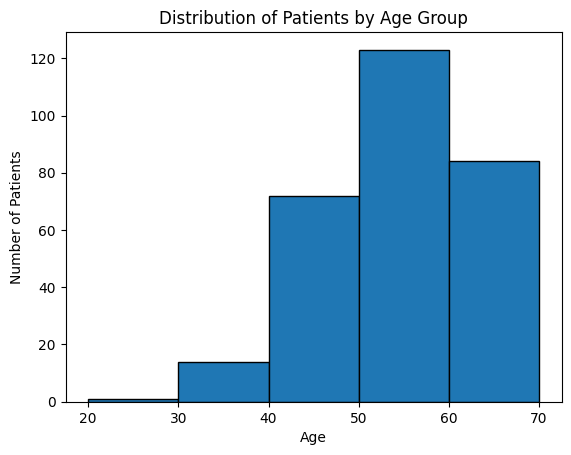

In [ ]:
plt.hist(health_care_df['age'],bins=age_groups, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients by Age Group')
plt.xticks(age_groups)
plt.show()

In [ ]:
health_care_df['age_groups'] = (np.floor(health_care_df['age'] / 10) *10).astype(int)

In [ ]:
health_care_df['age_groups'].value_counts()

age_groups
50    123
60     80
40     72
30     14
70     10
20      1
Name: count, dtype: int64

In [ ]:
#where patients have CVD
health_care_df[health_care_df['target'] == 1]['age_groups'].value_counts()

age_groups
50    64
40    50
60    32
30    10
70     6
20     1
Name: count, dtype: int64

In [ ]:
cvd_prevalence_per_age_group = np.round(health_care_df[health_care_df['target'] == 1]['age_groups'].value_counts() / health_care_df['age_groups'].value_counts() * 100,2)
cvd_prevalence_per_age_group

age_groups
20    100.00
30     71.43
40     69.44
50     52.03
60     40.00
70     60.00
Name: count, dtype: float64

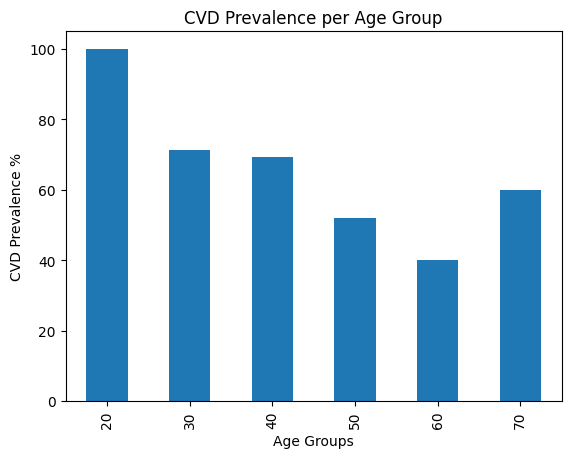

In [ ]:
cvd_prevalence_per_age_group.plot(kind='bar')

plt.xlabel('Age Groups')
plt.ylabel('CVD Prevalence %')
plt.title('CVD Prevalence per Age Group')
plt.show()

**Study the composition of overall patients w.r.t . Gender**

In [ ]:
health_care_df['sex'].value_counts()

sex
1    205
0     95
Name: count, dtype: int64

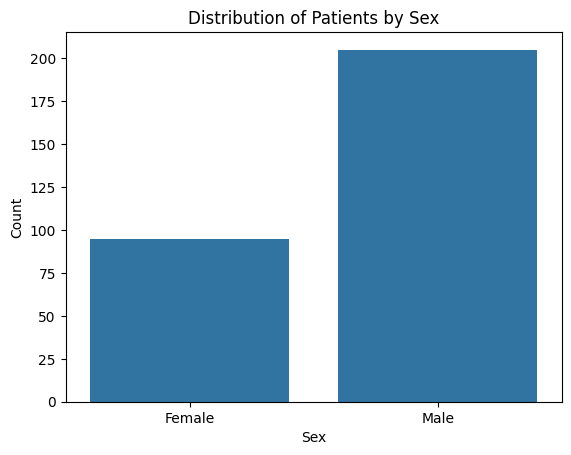

In [ ]:
sns.barplot(health_care_df['sex'].value_counts())
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Patients by Sex')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

In [ ]:
health_care_df.drop(['age_groups'], axis=1, inplace=True)

**Can we detect heart attack based on anomalies in Resting Blood Pressure of the patient?**

**And Checking for Outliers**

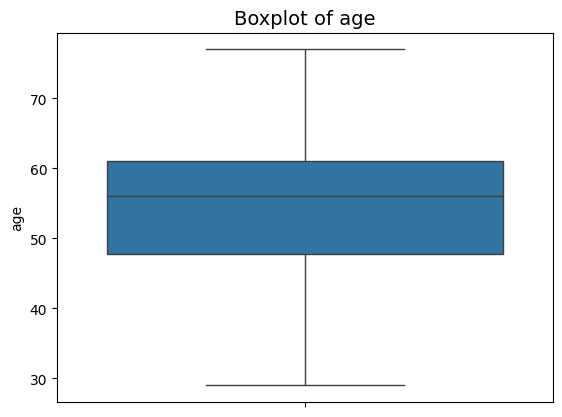

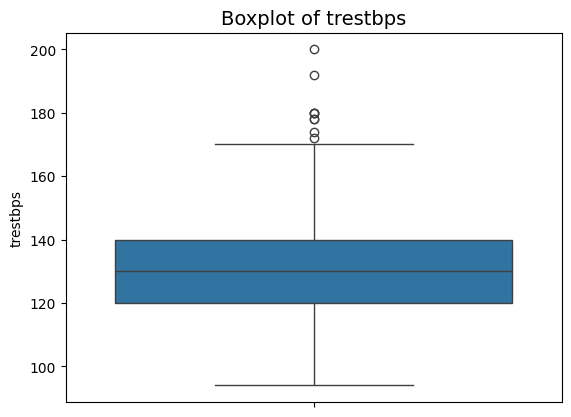

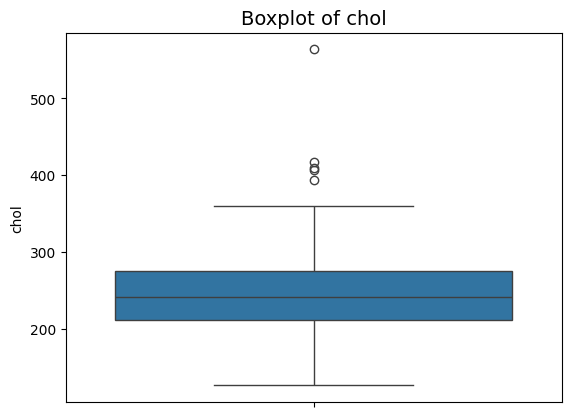

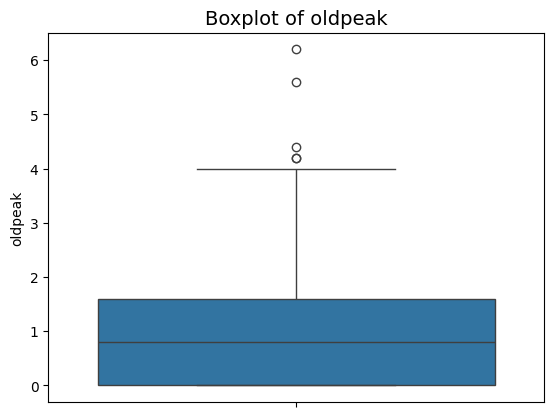

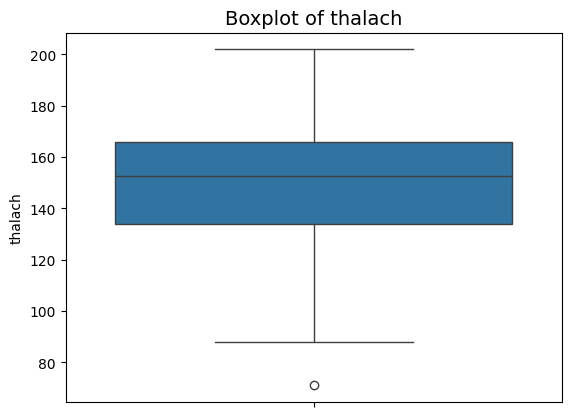

In [ ]:
for i in non_categorical_fields:
    sns.boxplot(health_care_df[i])
    plt.title(f'Boxplot of {i}', fontsize=14)
    plt.show()

In [ ]:
cleaned_df = health_care_df.copy()
outliers_df = pd.DataFrame()

In [ ]:
'''"
From the boxplot analysis, it's evident that many columns in the non-categorical fields contain outliers.
Although there were no outliers detected in the 'age' column, I included it in the process as it would not affect the 'age' data.
"'''
for i in non_categorical_fields:
    Q1, Q3 = np.percentile(health_care_df[i], [25, 75])
    IQR = Q3 - Q1
    UCL = Q3 + 1.5 * IQR
    LCL = Q1 - 1.5 * IQR
    if i == 'trestbps':
        TBPS_UCL = UCL
        TBPS_LCL = LCL

    outliers = health_care_df[(health_care_df[i] > UCL) | (health_care_df[i] < LCL)]
    outliers_df = pd.concat([outliers_df, outliers])
    cleaned_df.drop(cleaned_df[(cleaned_df[i] > UCL) | (cleaned_df[i] < LCL)].index,inplace=True)
    
    print(f"{i}:")
    print(f'UCL is {UCL} and LCL is {LCL}')
    if outliers[i].empty:
        print(f"No outliers found in {i}.")
    else:
        print(outliers[[i]])

    print("\n")


age:
UCL is 80.875 and LCL is 27.875
No outliers found in age.


trestbps:
UCL is 170.0 and LCL is 90.0
     trestbps
8         172
100       178
109       180
202       180
222       200
240       174
247       192
259       178
265       180


chol:
UCL is 371.0 and LCL is 115.0
     chol
28    417
84    564
95    394
219   407
245   409


oldpeak:
UCL is 4.0 and LCL is -2.4000000000000004
     oldpeak
100      4.2
203      6.2
220      5.6
249      4.2
289      4.4


thalach:
UCL is 214.375 and LCL is 85.375
     thalach
271       71




In [ ]:
outliers_df.reset_index(drop=True,inplace=True)
outliers_df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
1,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
2,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
3,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
4,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
5,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
6,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
7,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
8,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
9,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1


In [ ]:
cleaned_df.reset_index(drop=True,inplace=True)
cleaned_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
9,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1


In [ ]:
print(outliers_df.shape)
print(cleaned_df.shape)

(20, 14)
(281, 14)


In [ ]:
outliers_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,59.900000,0.450000,0.750000,158.250000,306.900000,0.250000,0.550000,143.800000,0.450000,2.490000,0.900000,1.000000,2.600000,0.35000
std,5.260578,0.510418,1.118034,26.349623,93.620117,0.444262,0.686333,25.134585,0.510418,1.982794,0.718185,1.256562,0.598243,0.48936
min,51.000000,0.000000,0.000000,114.000000,164.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
25%,55.750000,0.000000,0.000000,140.000000,246.000000,0.000000,0.000000,138.250000,0.000000,0.950000,0.000000,0.000000,2.000000,0.00000
50%,59.000000,0.000000,0.000000,166.000000,285.500000,0.000000,0.000000,147.500000,0.000000,1.750000,1.000000,0.000000,3.000000,0.00000
75%,64.250000,1.000000,2.000000,178.500000,343.750000,0.250000,1.000000,157.000000,1.000000,4.200000,1.000000,2.000000,3.000000,1.00000
max,68.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.00000


In [ ]:
cleaned_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,54.060498,0.701068,0.985765,129.896797,242.544484,0.138790,0.523132,150.064057,0.316726,0.955160,1.427046,0.701068,2.313167,0.558719
std,9.159689,0.458607,1.031544,15.441827,44.726618,0.346344,0.514433,22.673368,0.466030,1.028478,0.599864,0.987221,0.580767,0.497426
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


In [ ]:
Trestbps_anomalies = outliers_df[(outliers_df['trestbps'] > TBPS_UCL) | (outliers_df['trestbps'] < TBPS_LCL)]
Trestbps_anomalies.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
1,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
2,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
3,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
4,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
5,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
6,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
7,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
8,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
14,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


In [ ]:
Trestbps_anomalies['anomaly'] = 1 
cleaned_df['anomaly'] = 0

combined_df = pd.concat([Trestbps_anomalies[['anomaly', 'target']],cleaned_df[['anomaly', 'target']]])
combined_df

,anomaly,target
0,1,1
1,1,1
2,1,1
3,1,0
4,1,0
...,...,...
276,0,0
277,0,0
278,0,0
279,0,0


In [ ]:
contingency_table_anomalies = pd.crosstab(combined_df['anomaly'], combined_df['target'])
contingency_table_anomalies

target,0,1
anomaly,,
0,124,157
1,6,4


**Can we detect heart attack based on anomalies in Resting Blood Pressure of the patient?**

..............

**Hypothsis**

**H0: There is no association between anomalies in resting blood pressure and the occurrence of a heart attack.**


**H1: There is an association between anomalies in resting blood pressure and the occurrence of a heart attack.**

In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table_anomalies)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: {expected}")

Chi-square value: 0.4467930340586227
P-value: 0.50386183883783
Degrees of freedom: 1
Expected frequencies: [[125.53264605 155.46735395]
 [  4.46735395   5.53264605]]


In [ ]:
Trestbps_anomalies['trestbps'].corr(Trestbps_anomalies['target'])

-0.42812588169084825

**The p-value of 0.505 is above the 0.05 threshold so we fail to reject the null hypothesis. This means there's no significant evidence to suggest a link between resting blood pressure anomalies and heart attacks. The moderate negative correlation -0.428 also doesn't indicate a strong association.**

In [ ]:
cleaned_df.drop(columns=['anomaly'],axis=1,inplace=True)

In [ ]:
cleaned_df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
271,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
272,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
273,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
274,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
275,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
276,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
277,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
278,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
279,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
280,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


**Describe the relationship between Cholesterol levels and our target variable**

In [ ]:
cleaned_df['chol'].corr(cleaned_df['target'])

-0.10779114303177821

**Weak Negative correlation -0.107 between Cholesterol levels and our target variable**

**This suggests that higher cholesterol levels slightly decrease the likelihood of heart disease, but the relationship is not strong.**

..............

**What can be concluded about the relationship between peak exercising and occurrence of heart attack**

In [ ]:
cleaned_df['thalach'].corr(cleaned_df['target'])

0.43191042591158574

**There is a moderate positive correlation 0.43 between peak exercise heart rate and the occurrence of a heart attack.**

 **This suggests that as the peak exercise heart rate increases, the likelihood of experiencing a heart attack also tends to increase.**

..............

**Is thalassemia a major cause of CVD?**

In [ ]:
cleaned_df['thal'].corr(cleaned_df['target'])

-0.3729472588889269

In [ ]:
contingency_table_thal = pd.crosstab(cleaned_df['thal'], cleaned_df['target'])
contingency_table_thal

target,0,1
thal,,
1,11,6
2,33,126
3,80,25


**Hypothesis**

**H0: Thalassemia is a major cause of cardiovascular disease CVD.**
    **There is a significant association between thalassemia and CVD.**

**H1: Thalassemia is a major cause of cardiovascular disease CVD.**
    **There is a significant association between thalassemia and CVD.**

In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_table_thal)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: {expected}")

Chi-square value: 81.9308526958744
P-value: 1.6178616787554638e-18
Degrees of freedom: 2
Expected frequencies: [[ 7.50177936  9.49822064]
 [70.16370107 88.83629893]
 [46.33451957 58.66548043]]


**Since the p-value is extremely small, I can conclude that there is a strong association between thalassemia and the occurrence of cardiovascular disease (CVD).**
**Thus, thalassemia could be considered a significant factor or indicator related to CVD.**

..............

**How are the other factors determining the occurrence of CVD?**


**Use a pair plot to understand the relationship between all the given variables.**

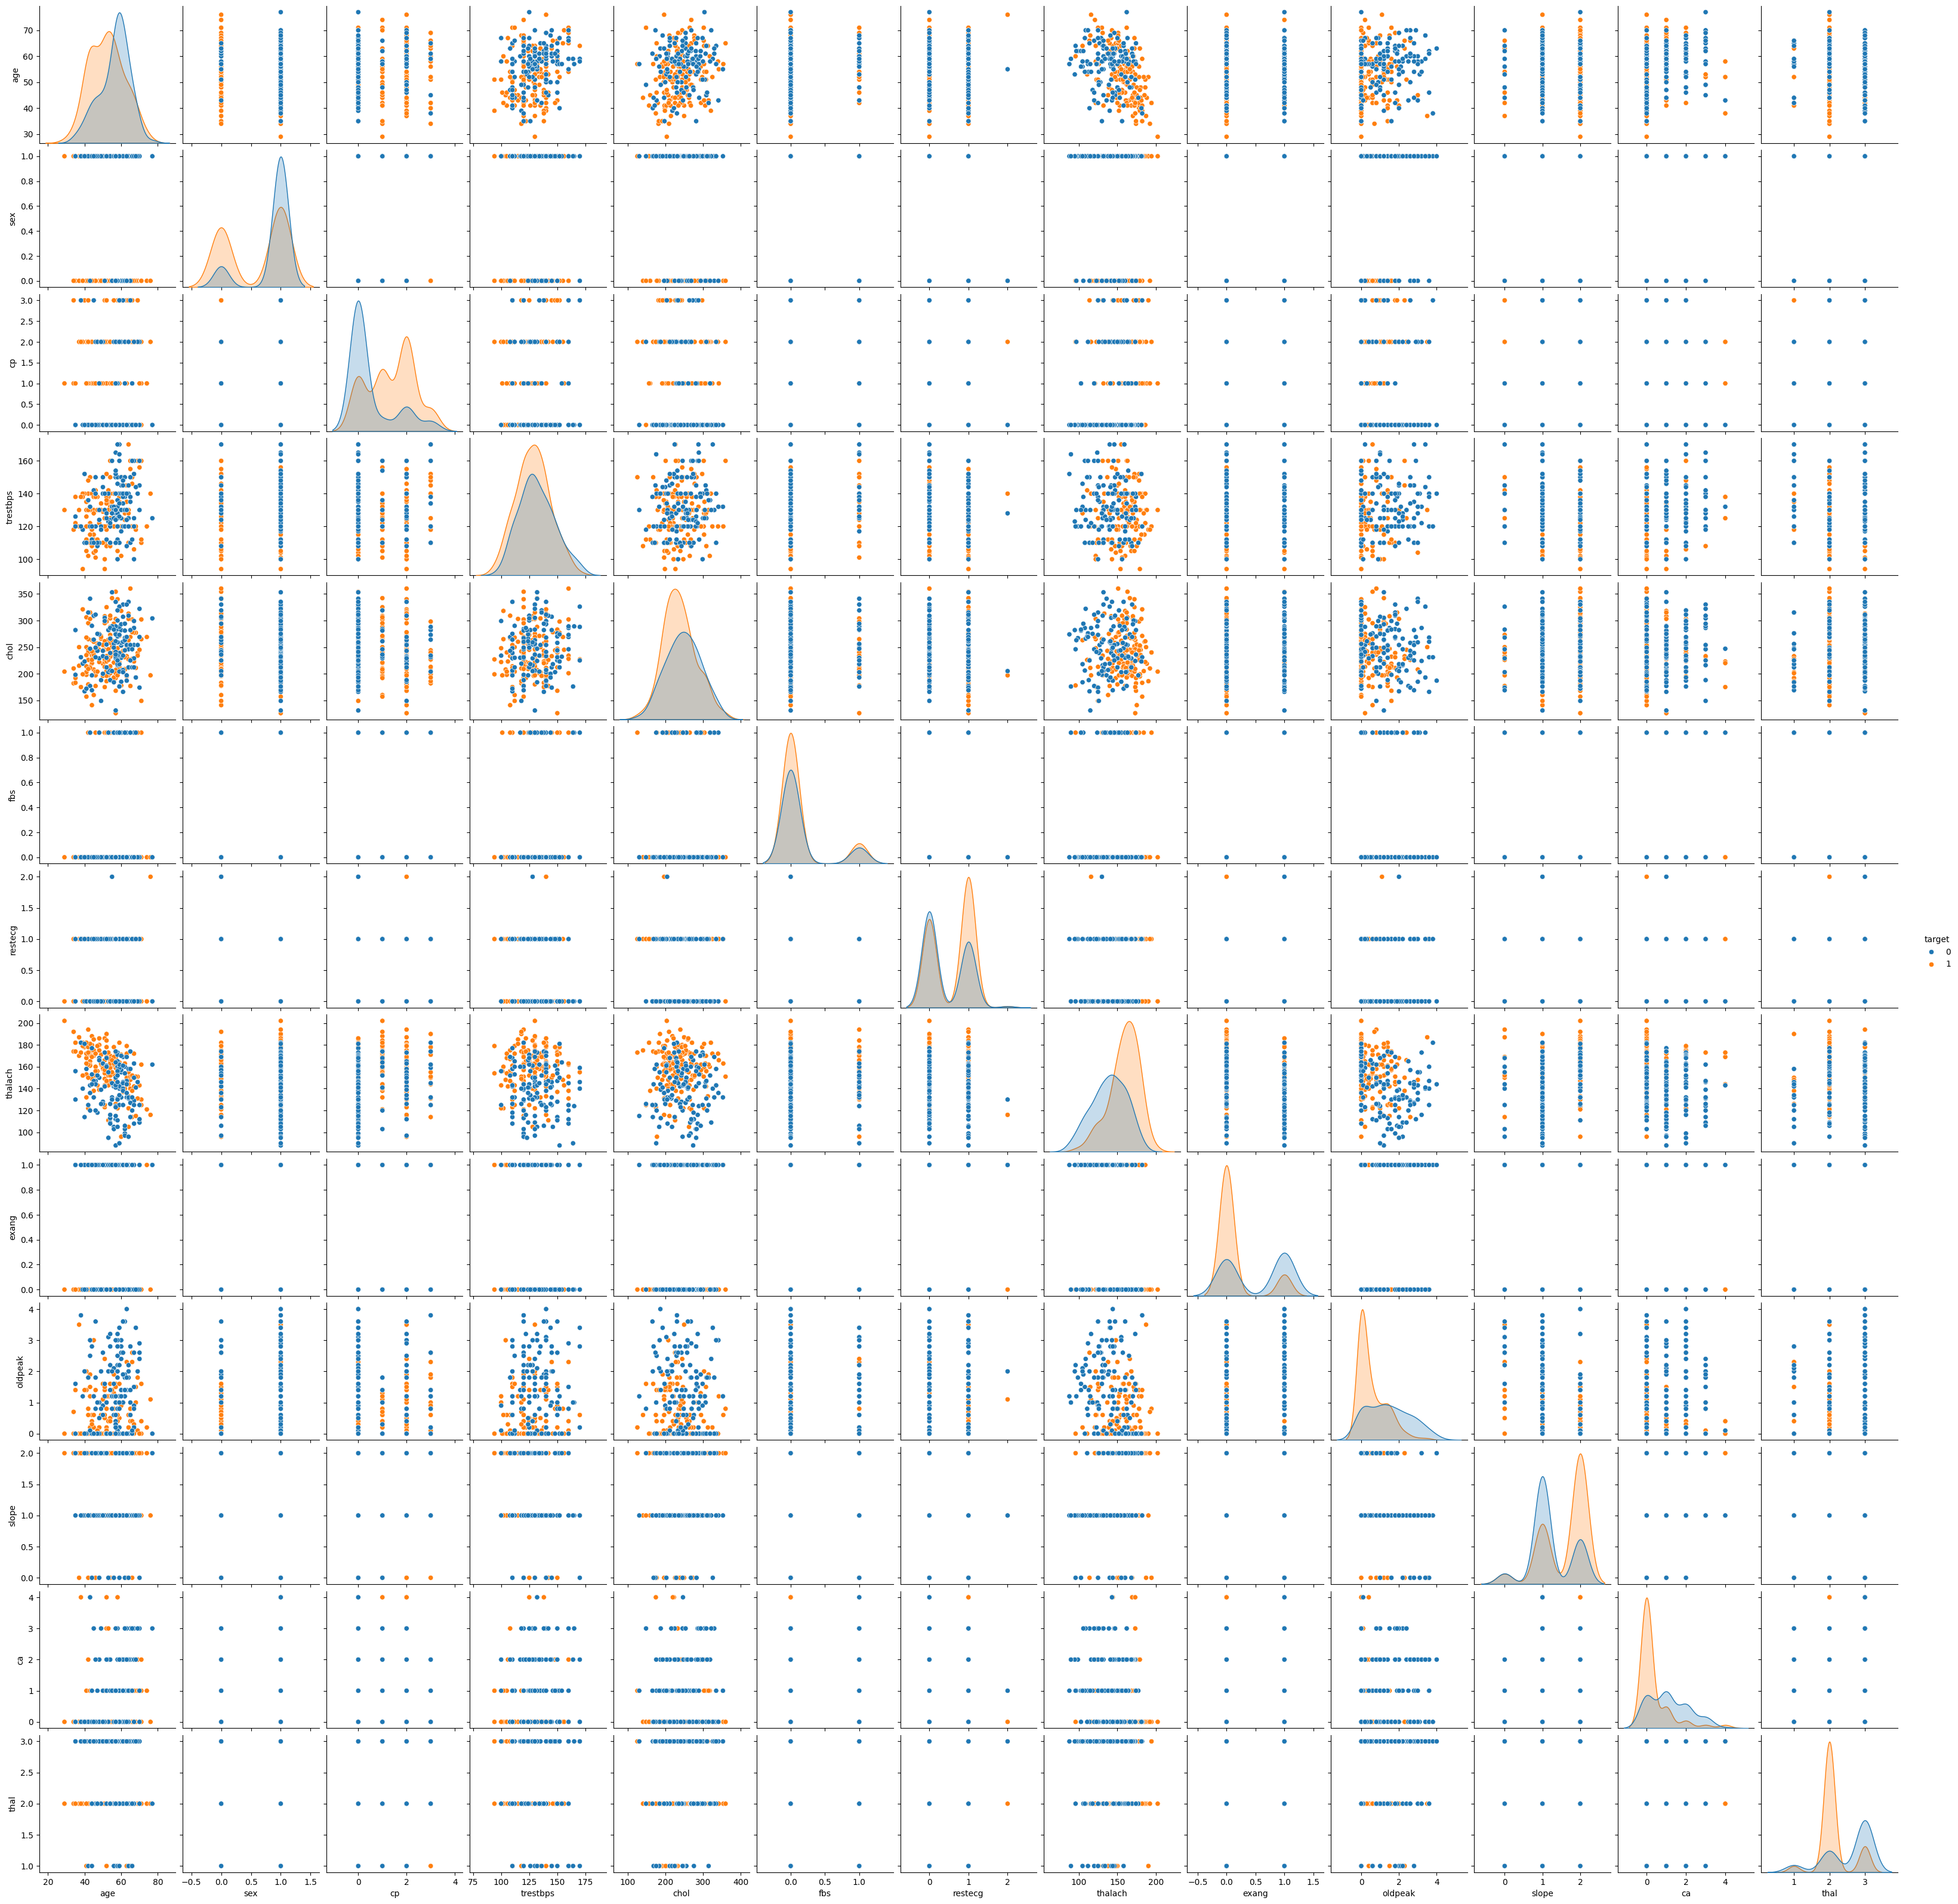

In [ ]:
sns.pairplot(data=cleaned_df,hue='target',diag_kind="kde")
plt.show()

In [ ]:
cleaned_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.064546,-0.059252,0.282567,0.170435,0.109922,-0.110578,-0.413376,0.095057,0.209255,-0.149667,0.320340,0.054163,-0.223788
sex,-0.064546,1.000000,-0.084521,0.007227,-0.125931,0.059773,-0.091691,-0.052420,0.177214,0.153206,-0.053592,0.149009,0.245468,-0.314173
cp,-0.059252,-0.084521,1.000000,0.083538,-0.081652,0.095518,0.088115,0.294139,-0.384335,-0.119773,0.090662,-0.172531,-0.189260,0.412291
trestbps,0.282567,0.007227,0.083538,1.000000,0.114734,0.129567,-0.139745,-0.072477,0.002077,0.144282,-0.083132,0.105033,-0.015100,-0.116145
chol,0.170435,-0.125931,-0.081652,0.114734,1.000000,0.020004,-0.142343,-0.022704,0.080109,-0.011385,0.039357,0.077708,0.076319,-0.107791
fbs,0.109922,0.059773,0.095518,0.129567,0.020004,1.000000,-0.088241,-0.028424,-0.007796,0.013523,-0.062827,0.163556,-0.039302,-0.016378
restecg,-0.110578,-0.091691,0.088115,-0.139745,-0.142343,-0.088241,1.000000,0.083770,-0.112602,-0.093211,0.118328,-0.091821,0.035436,0.179600
thalach,-0.413376,-0.052420,0.294139,-0.072477,-0.022704,-0.028424,0.083770,1.000000,-0.396369,-0.348365,0.385034,-0.258738,-0.137682,0.431910
exang,0.095057,0.177214,-0.384335,0.002077,0.080109,-0.007796,-0.112602,-0.396369,1.000000,0.318103,-0.255599,0.136663,0.226014,-0.427156
oldpeak,0.209255,0.153206,-0.119773,0.144282,-0.011385,0.013523,-0.093211,-0.348365,0.318103,1.000000,-0.524004,0.177399,0.188022,-0.433242


In [ ]:
x = cleaned_df.drop(columns='target',axis=1)
y = cleaned_df['target']

In [ ]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

summary = model.summary()
summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     22.46
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           8.30e-36
Time:                        20:08:12   Log-Likelihood:                -98.195
No. Observations:                 281   AIC:                             224.4
Df Residuals:                     267   BIC:                             275.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9220      0.324      2.848      0.005       0.285       1.559
age            0.0002      0.003      0.078      0.938      -0.005       0.006
sex           -0.1806      0.050     -3.642      0.000      -0.278      -0.083
cp             0.1014      0.023      4.396      0.000       0.056       0.147
trestbps      -0.0019      0.001     -1.290      0.198      -0.005       0.001
chol          -0.0007      0.000     -1.350      0.178      -0.002       0.000
fbs            0.0397      0.063      0.631      0.529      -0.084       0.164
restecg        0.0663      0.043      1.554      0.121      -0.018       0.150
thalach        0.0030      0.001      2.511      0.013       0.001       0.005
exang         -0.1102      0.054     -2.039      0.042      -0.217      -0.004
oldpeak       -0.0821      0.026     -3.211      0.001      -0.132      -0.032
slope          0.0754      0.043      1.744      0.082      -0.010       0.160
ca            -0.1098      0.024     -4.630      0.000      -0.156      -0.063
thal          -0.1511      0.039     -3.867      0.000      -0.228      -0.074
==============================================================================
Omnibus:                        7.159   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                7.359
Skew:                          -0.394   Prob(JB):                       0.0252
Kurtosis:                       2.912   Cond. No.                     4.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**I have decided to include the following columns in my model based on p-values, correlations, and pair plot analysis: ['age', 'sex', 'cp', 'thal', 'thalach', 'exang', 'oldpeak', 'ca'].**

**Although the p-value for age is not significant and it shows a weak negative correlation, I included it because age is a critical factor in cardiovascular disease (CVD).**

**I chose not to include other columns, such as 'trestbps,' due to insufficient statistical evidence and limited domain knowledge**

In [ ]:
x = cleaned_df.loc[:,['sex','cp','thal','thalach','exang','oldpeak','ca','age']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=.30,random_state=30)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression().fit(x_train_scaled, y_train)

In [ ]:
LR_model.intercept_

array([0.22785324])

In [ ]:
y_LR = pd.DataFrame(LR_model.predict(x_test_scaled),columns=['y_pred'])
y_LR


,y_pred
0,1
1,0
2,1
3,0
4,1
...,...
80,1
81,1
82,1
83,0


In [ ]:
LR_df = pd.concat([x_test.reset_index(drop=True), y_test.reset_index(drop=True), y_LR], axis=1)
LR_df

,sex,cp,thal,thalach,exang,oldpeak,ca,age,target,y_pred
0,1,2,2,179,1,0.4,0,44,1,1
1,1,0,3,140,1,3.4,0,59,0,0
2,1,0,2,171,0,1.5,0,43,1,1
3,0,0,2,106,0,1.9,3,62,0,0
4,0,2,2,130,0,0.0,1,71,1,1
...,...,...,...,...,...,...,...,...,...,...
80,1,1,3,141,0,0.3,0,57,0,1
81,1,0,2,185,0,0.0,0,45,1,1
82,0,2,2,158,0,1.6,0,54,1,1
83,1,0,3,143,1,3.0,1,57,0,0


In [ ]:
from sklearn.metrics import r2_score
r2_score(LR_df['target'],LR_df['y_pred'])

0.18637387387387394

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_LR = accuracy_score(y_test, y_LR)
accuracy_LR

0.8

'''''''''''''''

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
RF_model = RandomForestClassifier(n_estimators=100,random_state=30)
RF_model.fit(x_train_scaled,y_train)

RandomForestClassifier(random_state=30)

In [ ]:
y_RF = pd.DataFrame(RF_model.predict(x_test_scaled),columns=['y_pred'])

In [ ]:
RF_df = pd.concat([x_test.reset_index(drop=True),y_test.reset_index(drop=True),y_RF],axis=1)
RF_df

,sex,cp,thal,thalach,exang,oldpeak,ca,age,target,y_pred
0,1,2,2,179,1,0.4,0,44,1,1
1,1,0,3,140,1,3.4,0,59,0,0
2,1,0,2,171,0,1.5,0,43,1,1
3,0,0,2,106,0,1.9,3,62,0,0
4,0,2,2,130,0,0.0,1,71,1,1
...,...,...,...,...,...,...,...,...,...,...
80,1,1,3,141,0,0.3,0,57,0,1
81,1,0,2,185,0,0.0,0,45,1,1
82,0,2,2,158,0,1.6,0,54,1,1
83,1,0,3,143,1,3.0,1,57,0,0


In [ ]:
accuracy_RF = accuracy_score(y_test,y_RF)
accuracy_RF

0.8470588235294118

'''''''''''''''''

In [ ]:
from sklearn.svm import SVC
Svc_model = SVC(kernel='linear', random_state=30)
Svc_model.fit(x_train_scaled,y_train)

SVC(kernel='linear', random_state=30)

In [ ]:
y_SVC = pd.DataFrame(Svc_model.predict(x_test_scaled),columns=['y_pred'])
y_SVC

,y_pred
0,1
1,0
2,1
3,0
4,1
...,...
80,1
81,1
82,1
83,0


In [ ]:
SVC_df = pd.concat([x_test.reset_index(drop=True), y_test.reset_index(drop=True), y_SVC], axis=1)
SVC_df

,sex,cp,thal,thalach,exang,oldpeak,ca,age,target,y_pred
0,1,2,2,179,1,0.4,0,44,1,1
1,1,0,3,140,1,3.4,0,59,0,0
2,1,0,2,171,0,1.5,0,43,1,1
3,0,0,2,106,0,1.9,3,62,0,0
4,0,2,2,130,0,0.0,1,71,1,1
...,...,...,...,...,...,...,...,...,...,...
80,1,1,3,141,0,0.3,0,57,0,1
81,1,0,2,185,0,0.0,0,45,1,1
82,0,2,2,158,0,1.6,0,54,1,1
83,1,0,3,143,1,3.0,1,57,0,0


In [ ]:
accuracy_SVC = accuracy_score(y_test,y_SVC)
accuracy_SVC

0.8352941176470589

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_KNN = pd.DataFrame(KNN_model.predict(x_test_scaled),columns=['y_pred'])

In [ ]:
KNN_df = pd.concat([x_test.reset_index(drop=True), y_test.reset_index(drop=True), y_KNN], axis=1)
KNN_df

,sex,cp,thal,thalach,exang,oldpeak,ca,age,target,y_pred
0,1,2,2,179,1,0.4,0,44,1,1
1,1,0,3,140,1,3.4,0,59,0,0
2,1,0,2,171,0,1.5,0,43,1,1
3,0,0,2,106,0,1.9,3,62,0,0
4,0,2,2,130,0,0.0,1,71,1,1
...,...,...,...,...,...,...,...,...,...,...
80,1,1,3,141,0,0.3,0,57,0,1
81,1,0,2,185,0,0.0,0,45,1,1
82,0,2,2,158,0,1.6,0,54,1,1
83,1,0,3,143,1,3.0,1,57,0,0


In [ ]:
accuracy_KNN = accuracy_score(y_test,y_KNN)
accuracy_KNN

0.8

In [ ]:
print(f'LR accuracy is {accuracy_LR}, Rf accuracy is {accuracy_RF}, SVC accuracy is {accuracy_SVC}, KNN accuracy is {accuracy_KNN}')

LR accuracy is 0.8, Rf accuracy is 0.8470588235294118, SVC accuracy is 0.8352941176470589, KNN accuracy is 0.8


In [ ]:
from sklearn.metrics import classification_report
print("Logistic Regression (LR):")
print(classification_report(y_test, y_LR))

print("Random Forest (RF):")
print(classification_report(y_test, y_RF))

print("Support Vector Classifier (SVC):")
print(classification_report(y_test, y_SVC))

print("K-Nearest Neighbors (KNN):")
print(classification_report(y_test, y_KNN))

Logistic Regression (LR):
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        37
           1       0.83      0.81      0.82        48

    accuracy                           0.80        85
   macro avg       0.80      0.80      0.80        85
weighted avg       0.80      0.80      0.80        85

Random Forest (RF):
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        37
           1       0.86      0.88      0.87        48

    accuracy                           0.85        85
   macro avg       0.85      0.84      0.84        85
weighted avg       0.85      0.85      0.85        85

Support Vector Classifier (SVC):
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        37
           1       0.84      0.88      0.86        48

    accuracy                           0.84        85
   macro avg       0.83      0.83      0.83      

**Because the Random Forest model had the highest accuracy 0.85 and showed the best balance between precision, recall, and F1-score across all classes, it is the best option for this dataset. This suggests that RF constantly performs better than the other models in terms of decreasing false positives and finding true positives.**